In [96]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
#from gradient_2d import numerical_gradient

In [99]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4
    x = np.array(x)
    assert(x.ndim==1)
    l = [(f(x[i]+h) - f(x[i]-h)) / (2*h) for i in range(len(x))]
    return np.array(l)

# Test
#ret = _numerical_gradient_no_batch(lambda x:(x**2).sum(), [3.0, 4.0])
#assert(np.allclose(ret, [6,8]))


def numerical_gradient(f, Xs):
    l = [_numerical_gradient_no_batch(f, xc) for xc in Xs]
    return np.array(l)

#Test
#ret = numerical_gradient(lambda x: (x**2).sum(), [[0,0],[1,2],[3,4]])
#assert(np.allclose(ret, [[0,0],[2,4],[6,8]]))

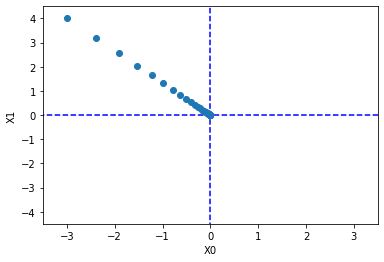

In [102]:
Xs = [[-3., 4.]]
lr = 0.1
f = lambda x: (x**2).sum()
nstep = 100

def gradient_descent(f, Xs, lr=0.01, nstep=100):
    history = []
    for i in range(nstep):
        history.append(list(*Xs))
        grad = numerical_gradient(f, Xs)
        Xs -= lr * grad

    history = np.array(history)
    return history

history = gradient_descent(f, Xs, lr, nstep)
    
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(history[:,0], history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()